In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv("CarPredictionData")

In [14]:
df.head()

,Unnamed: 0,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,0,Hyundai,VENUE,2021,S MT 1.2 KAPPA,Noida,Petrol,1st Owner,2589,807999
1,1,Hyundai,Grand i10,2014,ASTA 1.2 AT VTVT Automatic,Noida,Petrol,1st Owner,26779,420000
2,2,Hyundai,Grand i10,2017,MAGNA 1.2 KAPPA VTVT Manual,Noida,Petrol,1st Owner,9249,442199
3,3,Hyundai,Elite i20,2018,Magna Executive 1.2 Manual,Noida,Petrol,1st Owner,5937,577399
4,4,Hyundai,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32281,318699


In [15]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [16]:
df.head()

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,Hyundai,VENUE,2021,S MT 1.2 KAPPA,Noida,Petrol,1st Owner,2589,807999
1,Hyundai,Grand i10,2014,ASTA 1.2 AT VTVT Automatic,Noida,Petrol,1st Owner,26779,420000
2,Hyundai,Grand i10,2017,MAGNA 1.2 KAPPA VTVT Manual,Noida,Petrol,1st Owner,9249,442199
3,Hyundai,Elite i20,2018,Magna Executive 1.2 Manual,Noida,Petrol,1st Owner,5937,577399
4,Hyundai,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32281,318699


In [18]:
df.shape

(5609, 9)

In [19]:
df.isnull().sum()

Brand               0
Model               0
Year                0
Variant             0
Location            0
version             0
Number of Owners    0
KmDriven            0
Price               0
dtype: int64

In [20]:
df.dtypes

Brand               object
Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int64
dtype: object

In [21]:
df["Price"] = df["Price"].astype(int)

In [22]:
df.dtypes

Brand               object
Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int32
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Model']=le.fit_transform(df['Model'])
df['Year']=le.fit_transform(df['Year'])
df['Variant']=le.fit_transform(df['Variant'])
df['Location']=le.fit_transform(df['Location'])
df['version']=le.fit_transform(df['version'])
df['Number of Owners']=le.fit_transform(df['Number of Owners'])

In [24]:
df

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,7,108,14,389,6,2,0,2589,807999
1,7,54,7,212,6,2,0,26779,420000
2,7,54,10,345,6,2,0,9249,442199
3,7,41,11,359,6,2,0,5937,577399
4,7,129,6,255,6,0,0,32281,318699
...,...,...,...,...,...,...,...,...,...
5604,13,43,8,481,7,0,0,88216,596699
5605,7,129,6,429,7,2,0,113370,329699
5606,7,34,8,103,7,0,0,99645,782299
5607,6,69,8,89,7,3,0,108687,505199


In [25]:
df_cor=df.corr()

In [26]:
df_cor

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
Brand,1.000000,-0.071765,0.015836,0.337652,-0.024591,-0.081329,-0.056281,0.082222,-0.005158
Model,-0.071765,1.000000,-0.216313,0.185027,0.060198,-0.193640,0.054870,0.201725,-0.010156
Year,0.015836,-0.216313,1.000000,-0.034427,-0.068976,-0.060633,-0.273285,-0.433049,0.597801
Variant,0.337652,0.185027,-0.034427,1.000000,-0.075248,-0.087207,-0.061015,0.000832,-0.121981
Location,-0.024591,0.060198,-0.068976,-0.075248,1.000000,-0.107816,0.008148,0.088896,0.018143
version,-0.081329,-0.193640,-0.060633,-0.087207,-0.107816,1.000000,0.064414,-0.338634,-0.376419
Number of Owners,-0.056281,0.054870,-0.273285,-0.061015,0.008148,0.064414,1.000000,0.125883,-0.173718
KmDriven,0.082222,0.201725,-0.433049,0.000832,0.088896,-0.338634,0.125883,1.000000,-0.141915
Price,-0.005158,-0.010156,0.597801,-0.121981,0.018143,-0.376419,-0.173718,-0.141915,1.000000


Price is highly correlate with Year and least correlate with Brand.

# Data Visualizations

<AxesSubplot:>

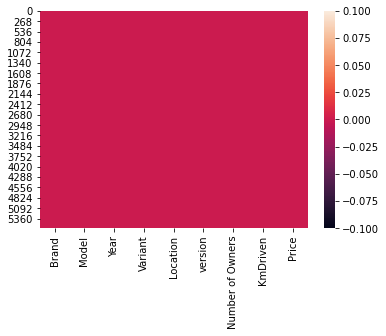

In [29]:
sns.heatmap(df.isnull())

No Null Values.

<AxesSubplot:>

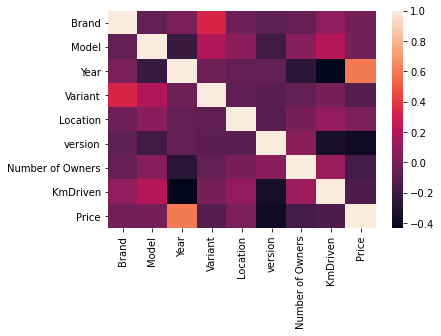

In [30]:
sns.heatmap(df_cor)

Price is highly correlate with Year and least correlate with version.

<AxesSubplot:>

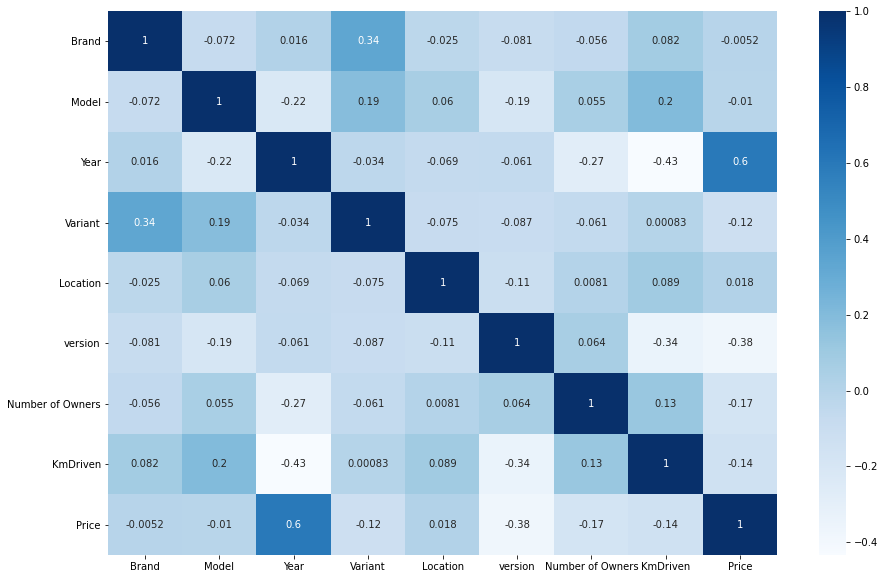

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Price is highly correlate with Year and least correlate with version.

In [37]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Brand', ylabel='Density'>

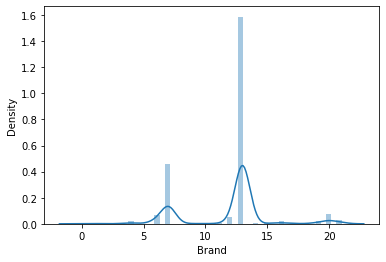

In [41]:
sns.distplot(df['Brand'])

<AxesSubplot:xlabel='Model', ylabel='Density'>

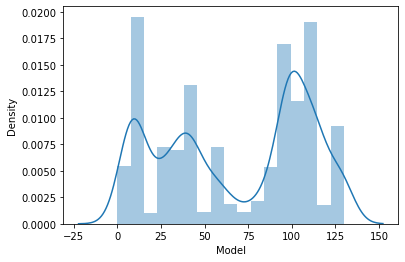

In [42]:
sns.distplot(df['Model'])

No skewness present.

<AxesSubplot:xlabel='Year', ylabel='Density'>

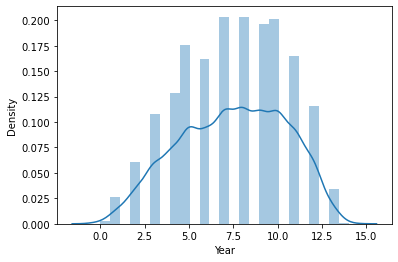

In [43]:
sns.distplot(df['Year'])

No Skewness Present.

<AxesSubplot:xlabel='Variant', ylabel='Density'>

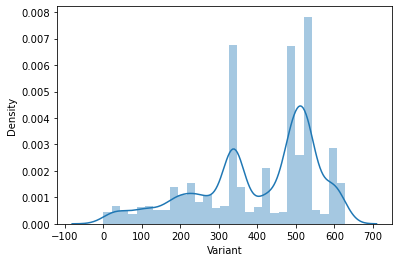

In [44]:
sns.distplot(df['Variant'])

No Skewness Present.

<AxesSubplot:xlabel='Location', ylabel='Density'>

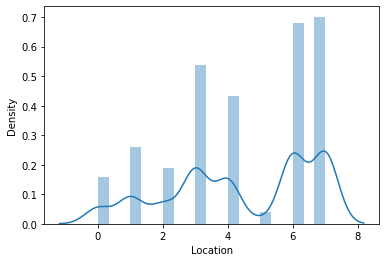

In [45]:
sns.distplot(df['Location'])

No Skewness present.

<AxesSubplot:xlabel='version', ylabel='Density'>

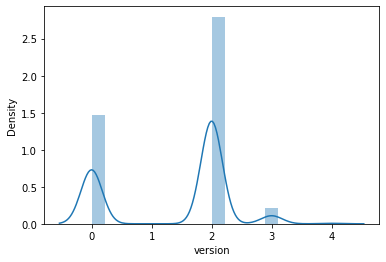

In [46]:
sns.distplot(df['version'])

skewness present.

<AxesSubplot:xlabel='Number of Owners', ylabel='Density'>

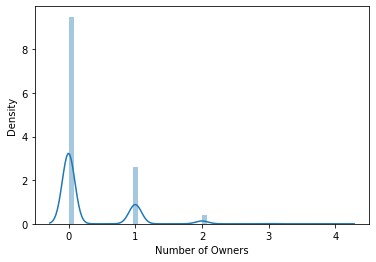

In [47]:
sns.distplot(df['Number of Owners'])

skewness present.

<AxesSubplot:xlabel='KmDriven', ylabel='Density'>

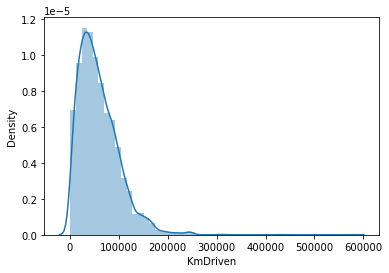

In [48]:
sns.distplot(df['KmDriven'])

skewness present.

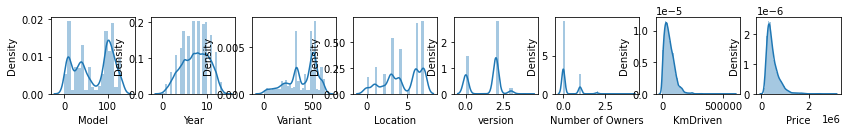

In [50]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

<AxesSubplot:xlabel='Price', ylabel='Model'>

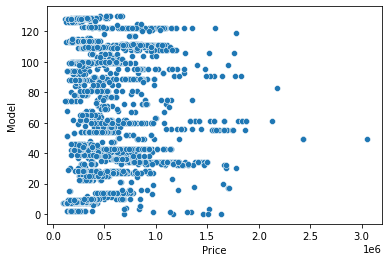

In [51]:
sns.scatterplot(x='Price',y='Model',data=df)

Model is in range between 0 to 130.

<AxesSubplot:xlabel='Price', ylabel='Year'>

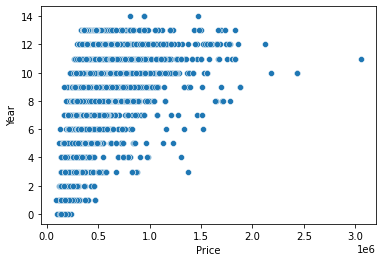

In [52]:
sns.scatterplot(x='Price',y='Year',data=df)

Year is range between 0 to 13 mainly.

<AxesSubplot:xlabel='Price', ylabel='Variant'>

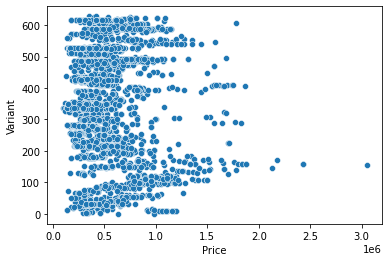

In [53]:
sns.scatterplot(x='Price',y='Variant',data=df)

Variant is scattered between 0 to 600.

<AxesSubplot:xlabel='Price', ylabel='Location'>

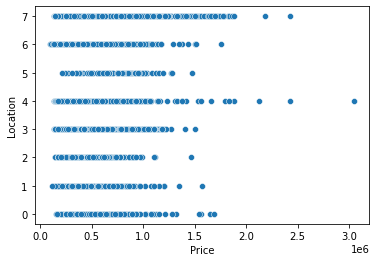

In [54]:
sns.scatterplot(x='Price',y='Location',data=df)

Location is scattered between 0 to 7 range.

<AxesSubplot:xlabel='Price', ylabel='version'>

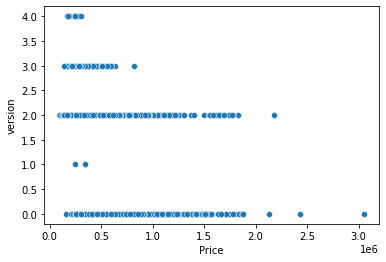

In [55]:
sns.scatterplot(x='Price',y='version',data=df)

version is scattered mainly between 0,2,3and 4 range.

<AxesSubplot:xlabel='Price', ylabel='Number of Owners'>

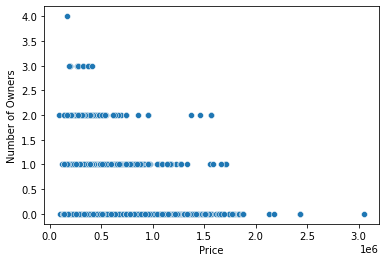

In [56]:
sns.scatterplot(x='Price',y='Number of Owners',data=df)

Number of Owners is scattered in between 0 to 3.

<AxesSubplot:xlabel='Price', ylabel='KmDriven'>

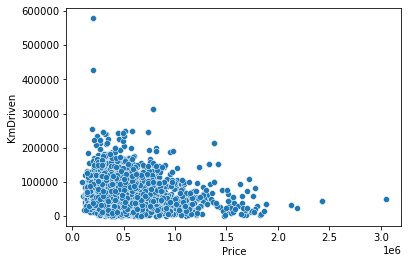

In [57]:
sns.scatterplot(x='Price',y='KmDriven',data=df)

Km driven is mainly scattered between 0 to 30,000.

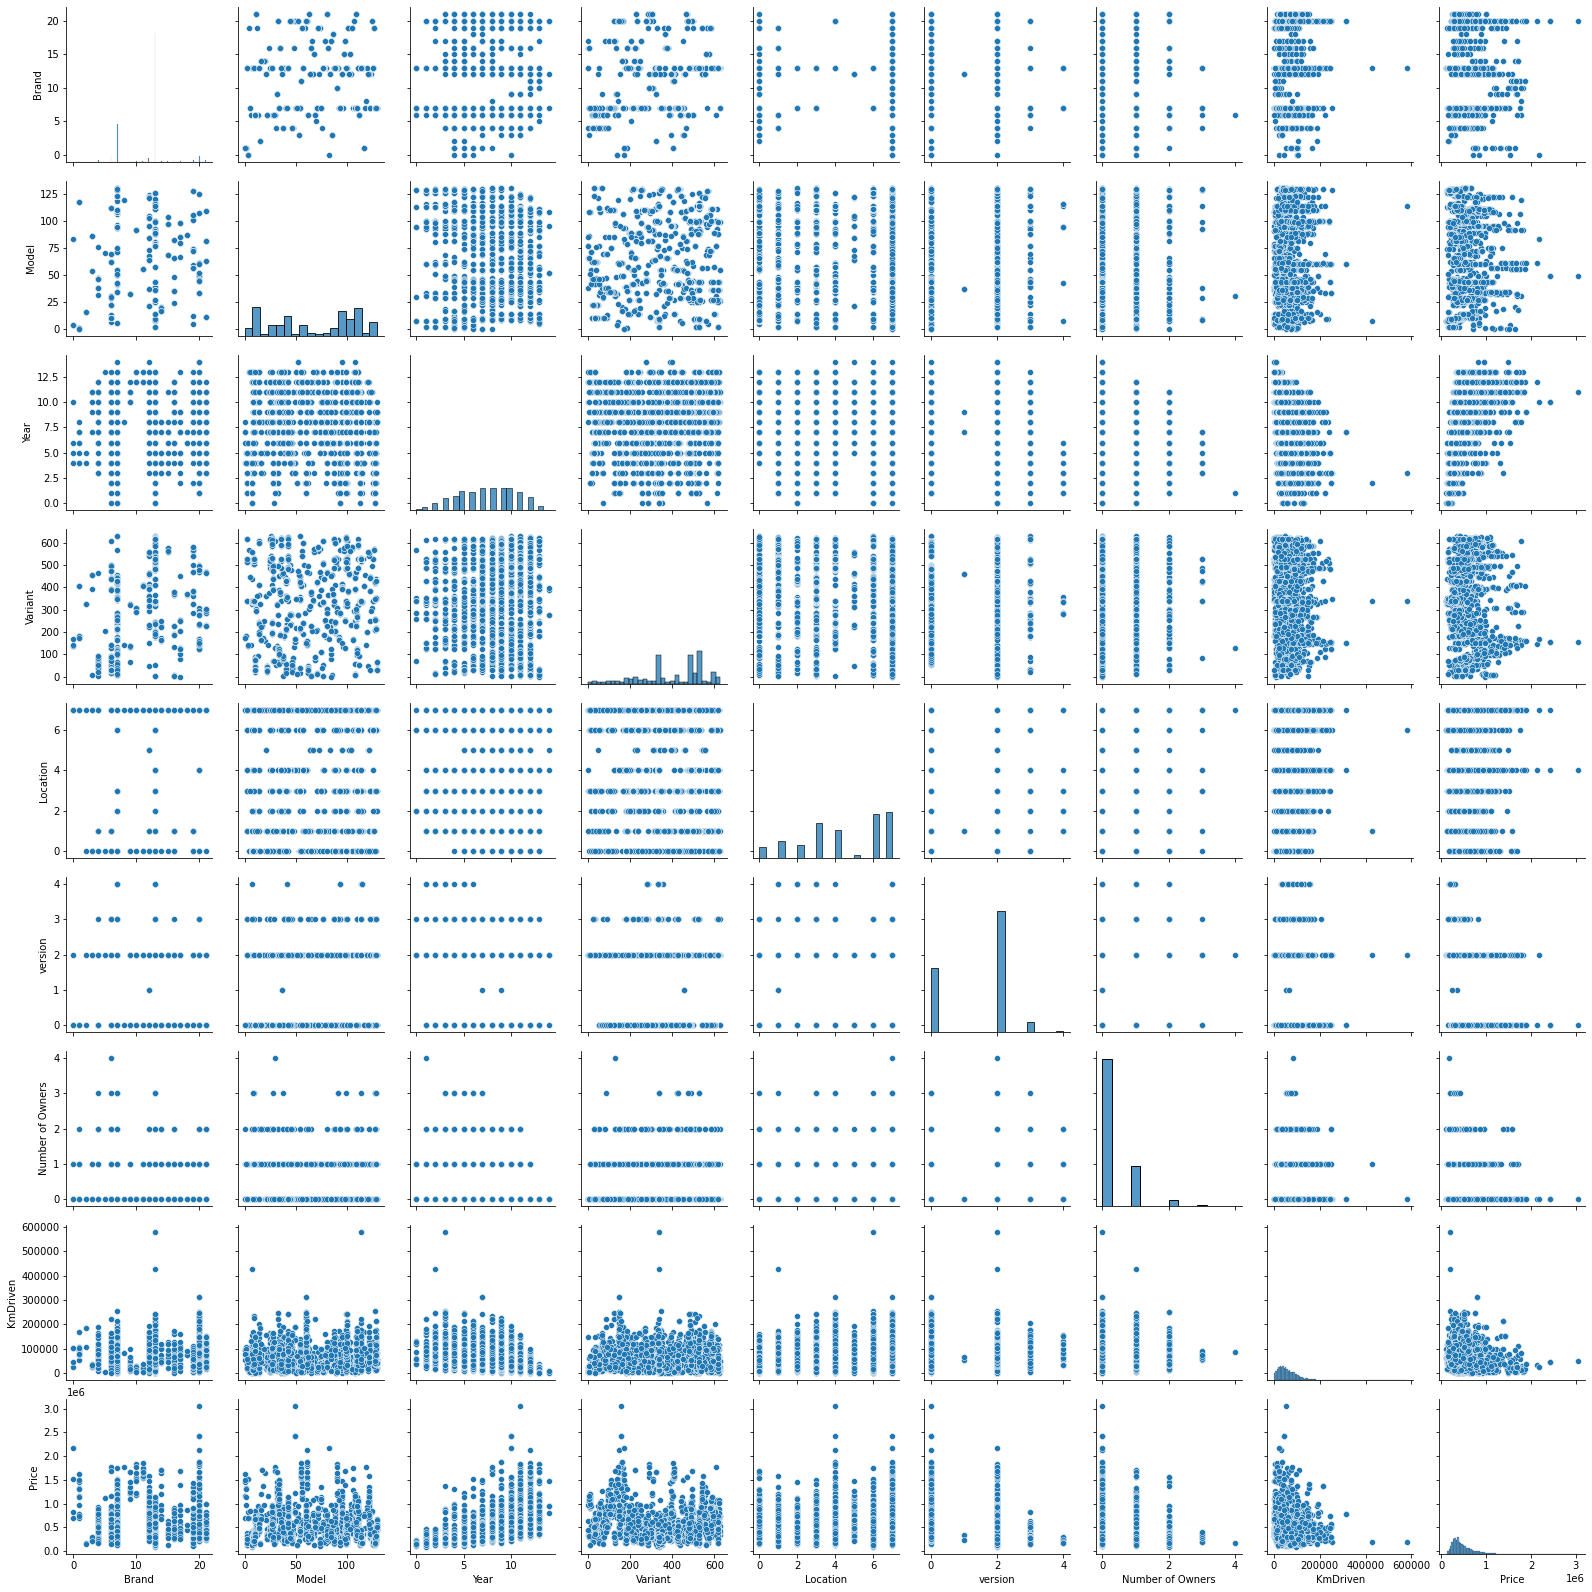

In [59]:
sns.pairplot(df)

In [60]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

<AxesSubplot:>

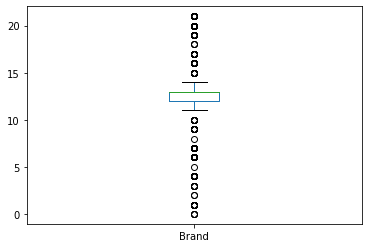

In [61]:
df['Brand'].plot.box()

There are very few outliers so we will keep them instead of removing from data.

<AxesSubplot:>

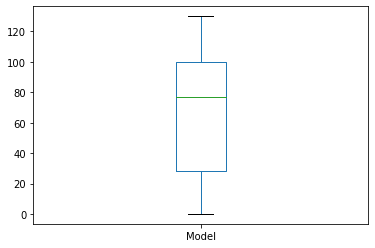

In [62]:
df['Model'].plot.box()

No Outliers present.

<AxesSubplot:>

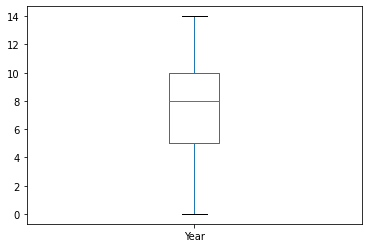

In [63]:
df['Year'].plot.box()

No Outliers present.

<AxesSubplot:>

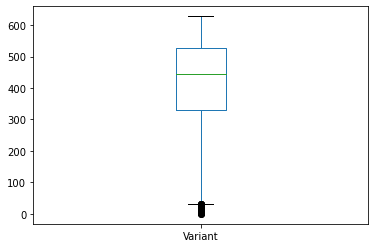

In [64]:
df['Variant'].plot.box()

outliers present.

<AxesSubplot:>

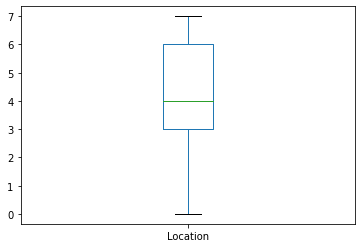

In [65]:
df['Location'].plot.box()

No Outliers present.

<AxesSubplot:>

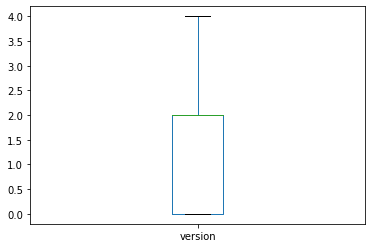

In [66]:
df['version'].plot.box()

No Outliers present.

<AxesSubplot:>

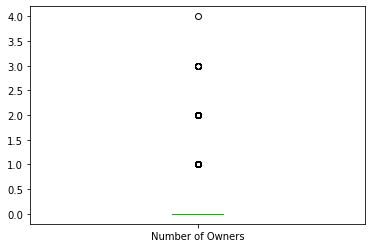

In [67]:
df['Number of Owners'].plot.box()

 Outliers present.

<AxesSubplot:>

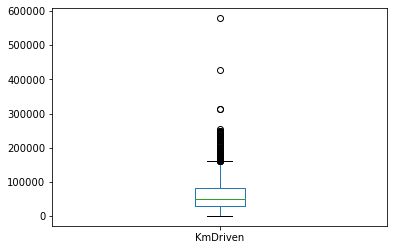

In [68]:
df['KmDriven'].plot.box()

Outliers present.

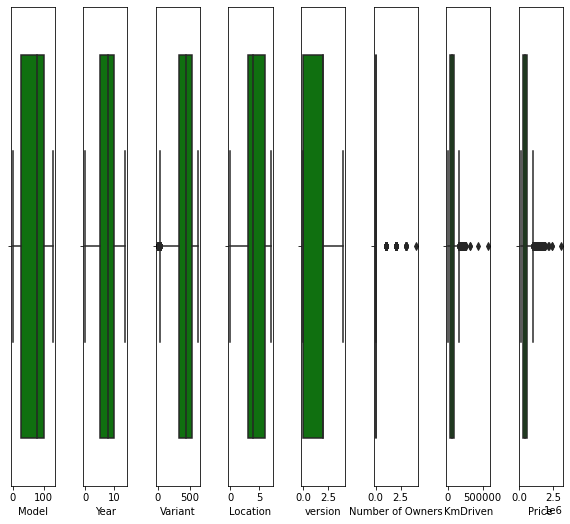

In [69]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing Outliers

In [70]:
def outlier_IQR(df,feature_name):
    IQR=df[feature_name].quantile(0.75)-df[feature_name].quantile(0.25)
    lower=df[feature_name].quantile(0.25)-(IQR*1.5)
    upper=df[feature_name].quantile(0.25)+(IQR*1.5)
    return (lower,upper)

In [71]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

In [72]:
outlier_IQR(df,'Brand')

(10.5, 13.5)

In [73]:
df['Brand'].describe()

count    5609.000000
mean       11.879836
std         3.370569
min         0.000000
25%        12.000000
50%        13.000000
75%        13.000000
max        21.000000
Name: Brand, dtype: float64

In [74]:
df.loc[df['Brand']>=13.5,'Brand']=13.5

In [79]:
df['Brand'].describe()

count    5609.000000
mean       11.495186
std         2.755356
min         0.000000
25%        12.000000
50%        13.000000
75%        13.000000
max        13.500000
Name: Brand, dtype: float64

In [80]:
outlier_IQR(df,'KmDriven')

(-50812.5, 108730.5)

In [81]:
df['KmDriven'].describe()

count      5609.000000
mean      59262.367445
std       41258.023068
min         648.000000
25%       28959.000000
50%       51456.000000
75%       82140.000000
max      578889.000000
Name: KmDriven, dtype: float64

In [82]:
df.loc[df['KmDriven']>=108730.5,'KmDriven']=108730.5

In [84]:
df['KmDriven'].describe()

count      5609.000000
mean      55560.243359
std       32130.617368
min         648.000000
25%       28959.000000
50%       51456.000000
75%       82140.000000
max      108730.500000
Name: KmDriven, dtype: float64

# Removing skewness

In [85]:
df.skew()

Brand              -1.352184
Model              -0.160912
Year               -0.183057
Variant            -0.698830
Location           -0.373517
version            -0.508579
Number of Owners    1.887131
KmDriven            0.244360
Price               1.964592
dtype: float64

skewness present in Brand,Variant and Number of Owners.

In [100]:
x=df.iloc[:,0:8]

In [102]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer(method='yeo-johnson',standardize=True)
df_new=power.fit_transform(x)
df1=pd.DataFrame(df_new,columns=x.columns)

In [103]:
df1.head()

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven
0,-1.738758,0.937757,2.252209,-0.162300,0.72158,0.570414,-0.562696,-2.164508
1,-1.738758,-0.216580,-0.170888,-1.280378,0.72158,0.570414,-0.562696,-0.836909
2,-1.738758,-0.216580,0.855706,-0.462882,0.72158,0.570414,-0.562696,-1.667021
3,-1.738758,-0.539631,1.202184,-0.368717,0.72158,0.570414,-0.562696,-1.884452
4,-1.738758,1.336248,-0.508028,-1.032498,0.72158,-1.375749,-0.562696,-0.628195


In [104]:
df1.skew()

Brand              -1.102135
Model              -0.343452
Year               -0.139372
Variant            -0.405663
Location           -0.288460
version            -0.382631
Number of Owners    1.215093
KmDriven           -0.158679
dtype: float64

In [105]:
y=df.iloc[:,-1]

In [106]:
y

0       807999
1       420000
2       442199
3       577399
4       318699
         ...  
5604    596699
5605    329699
5606    782299
5607    505199
5608    253399
Name: Price, Length: 5609, dtype: int32

In [107]:
x.shape

(5609, 8)

In [108]:
y.shape

(5609,)

# Scaling

In [132]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_=mms.fit_transform(df1)
df_x=pd.DataFrame(df_)

In [133]:
x=df_x

In [140]:
x

,0,1,2,3,4,5,6,7
0,0.034440,0.874885,1.000000,0.517882,0.8437,0.437191,0.0,0.063030
1,0.034440,0.528513,0.483375,0.225180,0.8437,0.437191,0.0,0.404339
2,0.034440,0.528513,0.702254,0.439192,0.8437,0.437191,0.0,0.190928
3,0.034440,0.431577,0.776126,0.463844,0.8437,0.437191,0.0,0.135029
4,0.034440,0.994456,0.411494,0.290072,0.8437,0.000000,0.0,0.457996
...,...,...,...,...,...,...,...,...
5604,0.819743,0.447018,0.555834,0.693204,1.0000,0.000000,0.0,0.876561
5605,0.034440,0.994456,0.411494,0.592391,1.0000,0.437191,0.0,1.000000
5606,0.034440,0.375694,0.555834,0.083859,1.0000,0.000000,0.0,0.946599
5607,0.016165,0.632186,0.555834,0.068701,1.0000,0.706070,0.0,0.999749


In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [135]:
x_train.shape

(3758, 8)

In [136]:
x_test.shape

(1851, 8)

In [137]:
y_train.shape

(3758,)

In [138]:
y_test.shape

(1851,)

In [141]:
lr=LinearRegression()

In [142]:
lr.fit(x_train,y_train)

LinearRegression()

In [143]:
lr.coef_

array([ -57670.38141709,   62454.20660413,  721064.38699708,
        -86031.20589234,   11663.18918363, -394488.1329089 ,
          5766.68742963,   -9635.90469849])

In [144]:
lr.intercept_

264502.4926284657

In [145]:
lr.score(x_train,y_train)

0.4955816898933316

In [ ]:
#predict the values
pred=lr.predict(x_test)
print("predicted result price:",pred)
print("actual price:",y_test)

In [147]:
print("error :")
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error :
Mean absolute error : 122826.19569762262
Mean squared error : 33340328610.443382
Root Mean Squared Error: 182593.34218542412


In [162]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5029626898510546


# Ensemble  Techniques

In [163]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.9200423947341388
5363405885.302807


In [164]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(r2_score(y_test,predad))
print(mean_squared_error(y_test,predad))

0.48670488471642803
34430871623.221596


 RandomForestRegressor model is a best model as it gives maximum r2score.

In [165]:
import joblib
joblib.dump(rf,'carRate.obj')

['carRate.obj']

In [166]:
file=joblib.load('carRate.obj')

In [167]:
file.predict(x_test)

array([377735.        , 461120.29      , 376854.9       , ...,
       374900.        , 744687.1       , 535263.67333333])